<a href="https://colab.research.google.com/github/AdrianDiazGaxiola/Proyecto-Final/blob/main/Temperaturas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install pandas
!pip install seaborn

Se importan las librerías a utilizar

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


En este ciclo se leen los archivos que contienen las temperaturas mínimas, medias y máximas por año, y se guardan en sus diccionarios respectivos, tomando como llave el año de cada archivo

In [3]:
Tmin = {}
Tmax = {}
Tmed = {}

for i in range(1985,2021):
  url1 = "https://github.com/AdrianDiazGaxiola/Proyecto-Final/blob/main/Data/Temperaturas_Minimas/%dTmin.xlsx?raw=true" % i
  Tmin[i] = pd.read_excel(url1, header = 1)
  url2 = "https://github.com/AdrianDiazGaxiola/Proyecto-Final/blob/main/Data/Temperaturas_Maximas/%dTmax.xlsx?raw=true" % i
  Tmax[i] = pd.read_excel(url2, header = 1)              
  url3 = "https://github.com/AdrianDiazGaxiola/Proyecto-Final/blob/main/Data/Temperaturas_Medias/%dTmed.xlsx?raw=true" % i
  Tmed[i] = pd.read_excel(url3, header = 1) 


Se guardan en dataframes distintos, los datos de cada estado, uno con las temperaturas mínimas, otro con las medias, y finalmente con las máximas por año (99 DataFrames en total, ya que también se realiza el de 'nacional')

---



In [5]:
tmin_todasentidades = {}
tmax_todasentidades = {}
tmed_todasentidades = {}

#Se guardan las abreviaturas de los estados en una lista
estados_abv = ['AGU', 'BCN', 'BCS', 'CAM', 'CHP', 'CHH', 'CMX', 'COA', 'COL', 'DUR', 'GUA', 'GRO', 'HID', 'JAL', 'MEX', 'MIC', 'MOR', 'NAY', 'NLE', 'OAX', 'PUE', 'QUE', 'ROO', 'SLP', 'SIN', 'SON', 'TAB', 'TAM', 'TLA', 'VER', 'YUC', 'ZAC', 'NAC']

#Se guarda en un arreglo los dataframes con las temperaturas mínimas, medias y máximas de todos los estados, con un dataframe distinto por año
for i in range (1985,2021):
  tmax_todasentidades[i] = pd.DataFrame (Tmax[i]) #columns = {'ENTIDAD', 'ANUAL'})
  tmin_todasentidades[i] = pd.DataFrame (Tmin[i])
  tmed_todasentidades[i] = pd.DataFrame (Tmed[i])

#Se guardan en una lista los nombres de los estados tal y como vienen en el archivo inicial.
df = pd.DataFrame(Tmax[1985])
estados_comp = df['ENTIDAD'].tolist()

anios = range(1985, 2021) #Lista con los años de los dataframe
tmin_por_entidad = {}
tmax_por_entidad = {}
tmed_por_entidad = {}

#Ciclo para guardar los datos de cada estado.
for i in range(33):
  df_min_entidad = pd.DataFrame(columns=['ENTIDAD', 'ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC', 'ANUAL']) #Dataframe en el que se guardará los datos de un solo estado.
  df_max_entidad = pd.DataFrame(columns=['ENTIDAD', 'ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC', 'ANUAL'])
  df_med_entidad = pd.DataFrame(columns=['ENTIDAD', 'ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC', 'ANUAL'])
  
  for j in range (1985, 2021):
    l = j - 1985 #Variable para guardar el año
   
    dfmin = pd.DataFrame (tmin_todasentidades[j])    
    dfmax = pd.DataFrame(tmax_todasentidades[j]) #columns = {'ANIO', 'ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC', 'ANUAL'}) #Se crea un dataframe con las columnas de 'Año' y 'Anual'
    dfmed = pd.DataFrame (tmed_todasentidades[j])
   
    df_min_entidad = df_min_entidad.append(dfmin.loc[i], ignore_index=True) #Se copia la fila con los datos del estado correspondiente al nuevo dataframe
    df_max_entidad = df_max_entidad.append(dfmax.loc[i], ignore_index=True)
    df_med_entidad = df_med_entidad.append(dfmed.loc[i], ignore_index=True)
   
    df_min_entidad.at[l, 'ENTIDAD'] = anios[l] #Se guarda el número del año correspondiente en el dataframe
    df_max_entidad.at[l, 'ENTIDAD'] = anios[l]
    df_med_entidad.at[l, 'ENTIDAD'] = anios[l]
  
  df_min_entidad.rename(columns = {'ENTIDAD':'ANIO'}, inplace = True)
  df_max_entidad.rename(columns = {'ENTIDAD':'ANIO'}, inplace = True) 
  df_med_entidad.rename(columns = {'ENTIDAD':'ANIO'}, inplace = True) 

  tmin_por_entidad[estados_abv[i]] = df_min_entidad
  tmax_por_entidad[estados_abv[i]] = df_max_entidad #Se guarda en el diccionario de las temperaturas por entidad el dataframe creado en el ciclo, identificado por la abreviatura de la entidad
  tmed_por_entidad[estados_abv[i]] = df_med_entidad

Ejemplos de los dataframes creados

In [ ]:

print (tmin_por_entidad['NAC'].head())
print (tmax_por_entidad['SIN'].head())


   ANIO       ENE       FEB  ...        NOV       DIC      ANUAL
0  1985  7.995534  8.918779  ...  11.055804  9.244794  12.984091
1  1986  7.578413  9.166274  ...  12.024500  9.446455  13.027165
2  1987  7.519999  8.954563  ...  10.699737  9.627296  12.814918
3  1988  7.870151  9.495767  ...  10.847616  9.065313  12.991370
4  1989  9.107985  9.257366  ...  11.664921  8.487009  12.882815

[5 rows x 14 columns]
   ANIO        ENE        FEB  ...        NOV        DIC      ANUAL
0  1985  25.052723  27.389650  ...  30.285291  28.658107  31.712254
1  1986  29.600945  28.816315  ...  31.656784  27.022625  32.455905
2  1987  27.082363  27.418335  ...  31.937677  28.061160  32.690774
3  1988  28.361302  30.802846  ...  31.793567  28.374703  32.837289
4  1989  26.621673  29.453855  ...  30.457822  26.970771  32.472478

[5 rows x 14 columns]


Se combinan todos los datos de las temperaturas medias, mínimas y máximas en un solo dataframe

In [6]:
df_completo = pd.DataFrame(columns=["ANIO", "MES", "ENTIDAD", "T_Max", "T_Min", "T_Med"])

#Se guardan las abreviaturas de los estados en una lista
estados_abv = ['AGU', 'BCN', 'BCS', 'CAM', 'CHP', 'CHH', 'CMX', 'COA', 'COL', 'DUR', 'GUA', 'GRO', 'HID', 'JAL', 'MEX', 'MIC', 'MOR', 'NAY', 'NLE', 'OAX', 'PUE', 'QUE', 'ROO', 'SLP', 'SIN', 'SON', 'TAB', 'TAM', 'TLA', 'VER', 'YUC', 'ZAC', 'NAC']

#Se guardan las abreviaturas de los meses en una lista
df = tmax_todasentidades[1985]
meses_abv = df.columns.values.tolist()
meses_abv.remove("ENTIDAD")

for i in range(1985, 2021):
  df1 = tmax_todasentidades[i]
  df2 = tmin_todasentidades[i]
  df3 = tmed_todasentidades[i]

  for j in meses_abv:
    m = 0 #Variable para acceder a las filas de los dataframes (una por entidad)
    for k in estados_abv:
 
      #Se copian las temperaturas correspondientes a la entidad, mes y año, donde j es el mes y m la fila de la entidad 
      #tmax = df1[j].where(df1['ENTIDAD'] == k).values[0]
      tmax = df1.at[m, j]
      #tmin = df2[j].where(df2['ENTIDAD'] == k).values[0]
      tmin = df2.at[m, j]
      #tmed = df3[j].where(df3['ENTIDAD'] == k).values[0]
      tmed = df3.at[m, j]

      #Se adjuntan al dataframe con los datos completos el año, mes, entidad y temperaturas correspondientes
      df_completo = df_completo.append({"ANIO": i, "MES": j, "ENTIDAD": k, "T_Max": tmax, "T_Min": tmin, "T_Med": tmed}, ignore_index=True)

      m += 1
     
print (df_completo)

       ANIO    MES ENTIDAD      T_Max      T_Min      T_Med
0      1985    ENE     AGU  20.712779   3.221408  11.967094
1      1985    ENE     BCN  17.562808   4.541772  11.052290
2      1985    ENE     BCS  22.659097   8.745975  15.702536
3      1985    ENE     CAM  29.954718  15.909566  22.932142
4      1985    ENE     CHP  15.060987   1.816757   8.438872
...     ...    ...     ...        ...        ...        ...
15439  2020  ANUAL     TLA  23.500000   7.100000  15.300000
15440  2020  ANUAL     VER  28.800000  17.800000  23.300000
15441  2020  ANUAL     YUC  33.400000  21.200000  27.300000
15442  2020  ANUAL     ZAC  27.200000   9.400000  18.300000
15443  2020  ANUAL     NAC  30.100000  14.900000  22.400000

[15444 rows x 6 columns]


Se guarda en otro dataframe los datos completos de las temperaturas (pero solo a nivel nacional) y se descarga los dataframe con los datos de todas las temperaturas (por entidad y nacional)

In [15]:
  df_nacional = df_completo.loc[df_completo["ENTIDAD"] == "NAC"]
  
  df_completo.to_csv("Temperaturas Completo por Entidad.csv", encoding='utf-8', index=False)
  df_nacional.to_csv("Temperaturas Completo Nacional.csv", encoding='utf-8', index=False)
  from google.colab import files
  files.download("Temperaturas Completo Nacional.csv")
  files.download("Temperaturas Completo por Entidad.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Se obtienen los modelos de regresión lineal para las temperaturas medias y se adjunta al dataframe de cada estado las predicciones de las temperaturas medias de los próximos 10 años


In [ ]:
df = tmed_por_entidad['NAC']
Cols = df.columns.values.tolist() #Se guardan los nombres de las columnas de los dataframes originales en una lista

Meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre", "Anuales"]

#Se guardan los años futuros en un arreglo de numpy y se utiliza la función reshape() ya que necesita ser un arreglo bidimensional para ser utilizado en la función regressor.predict(), la cual se utilizará para predecir las temperaturas de los próximos años
Anios = range(2021, 2031)
x2 = np.array(Anios).reshape((-1, 1))

data = {'ANIO': ["2021", "2022", "2023", "2024", "2025", "2026", "2027", "2028", "2029", "2030"]}
df2 = pd.DataFrame(data)

l = 0 #Variable para acceder a estados_comp[] dentro del ciclo (ya que i es no numérico)
for i in estados_abv:
  df = tmed_por_entidad[i]  

  for j in range (1, 14): 
    X = df[[Cols[0]]]
    y = df[[Cols[j]]] #Se toma como eje 'y' los valores de las temperaturas del mes correspondiente (en total se evalúan los doce meses, así como las temperaturas promedio anuales)
    regressor = LinearRegression()
    regressor.fit(X, y) #Se calcula la regresión lineal a partir de los años y de las temperaturas registradas durante estos años de acuerdo a la columna analizada
    y_pred = regressor.predict(x2) #Se calculan las predicciones de las temperaturas de los 10 años siguientes
    
    #Se van guardando en otro dataframe las predicciones de las temperaturas para después concatenarlas al dataframe con las temperaturas originales
    df2[Cols[j]] = y_pred

    #Se grafican las temperaturas registradas junto al modelo de regresión lineal encontrado
    plt.figure()
    if (Cols[j] == "ANUAL"): #Si la columna corresponde a las temperaturas anuales, se cambia el color de los puntos en la gráfica
      plt.scatter(X, y, color = 'green')
    else:
      plt.scatter(X, y, color = 'lawngreen')
    if (i == "NAC"):
      plt.plot(X, regressor.predict(X), color = 'navy')
    else:     
      plt.plot(X, regressor.predict(X), color = 'dodgerblue')
    plt.title('Temperaturas Medias %s %s' % (Meses[j-1], estados_comp[l]))
    plt.xlabel('Año')
    plt.ylabel('Temperatura')

  tmed_por_entidad[i] = df.append(df2, ignore_index=True) #Se guarda el dataframe con las temperaturas medias originales, ahora con las predicciones concatenadas
  
  l = l+1

print(tmed_por_entidad['SIN'])

    

Se obtienen los modelos de regresión lineal para las temperaturas mínimas y se adjunta al dataframe de cada estado las predicciones de las temperaturas mínimas de los próximos 10 años


In [ ]:
df = tmin_por_entidad['NAC']
Cols = df.columns.values.tolist() #Se guardan los nombres de las columnas de los dataframes originales en una lista

Meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre", "Anuales"]

#Se guardan los años futuros en un arreglo de numpy y se utiliza la función reshape() ya que necesita ser un arreglo bidimensional para ser utilizado en la función regressor.predict(), la cual se utilizará para predecir las temperaturas de los próximos años
Anios = range(2021, 2031)
x2 = np.array(Anios).reshape((-1, 1))

data = {'ANIO': ["2021", "2022", "2023", "2024", "2025", "2026", "2027", "2028", "2029", "2030"]}
df2 = pd.DataFrame(data)

l = 0 #Variable para acceder a estados_comp[] dentro del ciclo (ya que i es no numérico)
for i in estados_abv:
  df = tmin_por_entidad[i]  

  for j in range (1, 14): 
    X = df[[Cols[0]]]
    y = df[[Cols[j]]] #Se toma como eje 'y' los valores de las temperaturas del mes correspondiente (en total se evalúan los doce meses, así como las temperaturas promedio anuales)
    regressor = LinearRegression()
    regressor.fit(X, y) #Se calcula la regresión lineal a partir de los años y de las temperaturas registradas durante estos años de acuerdo a la columna analizada
    y_pred = regressor.predict(x2) #Se calculan las predicciones de las temperaturas de los 10 años siguientes
    
    #Se van guardando en otro dataframe las predicciones de las temperaturas para después concatenarlas al dataframe con las temperaturas originales
    df2[Cols[j]] = y_pred

    #Se grafican las temperaturas registradas junto al modelo de regresión lineal encontrado
    plt.figure()
    if (Cols[j] == "ANUAL"): #Si la columna corresponde a las temperaturas anuales, se cambia el color de los puntos en la gráfica
      plt.scatter(X, y, color = 'navy')
    else:
      plt.scatter(X, y, color = 'mediumspringgreen')
    if (i == "NAC"):
      plt.plot(X, regressor.predict(X), color = 'firebrick')
    else:     
      plt.plot(X, regressor.predict(X), color = 'orange')
    plt.title('Temperaturas Mínimas %s %s' % (Meses[j-1], estados_comp[l]))
    plt.xlabel('Año')
    plt.ylabel('Temperatura')

  tmed_por_entidad[i] = df.append(df2, ignore_index=True) #Se guarda el dataframe con las temperaturas medias originales, ahora con las predicciones concatenadas
  
  l = l+1

Se obtienen los modelos de regresión lineal para las temperaturas máximas y se adjunta al dataframe de cada estado las predicciones de las temperaturas máximas de los próximos 10 años

In [ ]:
df = tmax_por_entidad['NAC']
Cols = df.columns.values.tolist() #Se guardan los nombres de las columnas de los dataframes originales en una lista

Meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre", "Anuales"]

#Se guardan los años futuros en un arreglo de numpy y se utiliza la función reshape() ya que necesita ser un arreglo bidimensional para ser utilizado en la función regressor.predict(), la cual se utilizará para predecir las temperaturas de los próximos años
Anios = range(2021, 2031)
x2 = np.array(Anios).reshape((-1, 1))

data = {'ANIO': ["2021", "2022", "2023", "2024", "2025", "2026", "2027", "2028", "2029", "2030"]}
df2 = pd.DataFrame(data)

l = 0 #Variable para acceder a estados_comp[] dentro del ciclo (ya que i es no numérico)
for i in estados_abv:
  df = tmax_por_entidad[i]  

  for j in range (1, 14): 
    X = df[[Cols[0]]]
    y = df[[Cols[j]]] #Se toma como eje 'y' los valores de las temperaturas del mes correspondiente (en total se evalúan los doce meses, así como las temperaturas promedio anuales)
    regressor = LinearRegression()
    regressor.fit(X, y) #Se calcula la regresión lineal a partir de los años y de las temperaturas registradas durante estos años de acuerdo a la columna analizada
    y_pred = regressor.predict(x2) #Se calculan las predicciones de las temperaturas de los 10 años siguientes
    
    #Se van guardando en otro dataframe las predicciones de las temperaturas para después concatenarlas al dataframe con las temperaturas originales
    df2[Cols[j]] = y_pred

    #Se grafican las temperaturas registradas junto al modelo de regresión lineal encontrado
    plt.figure()
    if (Cols[j] == "ANUAL"): #Si la columna corresponde a las temperaturas anuales, se cambia el color de los puntos en la gráfica
      plt.scatter(X, y, color = 'red')
    else:
      plt.scatter(X, y, color = 'orange')
    if (i == "NAC"):
      plt.plot(X, regressor.predict(X), color = 'darkcyan')
    else:     
      plt.plot(X, regressor.predict(X), color = 'mediumspringgreen')
    plt.title('Temperaturas Máximas %s %s' % (Meses[j-1], estados_comp[l]))
    plt.xlabel('Año')
    plt.ylabel('Temperatura')

  tmed_por_entidad[i] = df.append(df2, ignore_index=True) #Se guarda el dataframe con las temperaturas medias originales, ahora con las predicciones concatenadas
  
  l = l+1

Se guardan los dataframes de las Temperaturas Mínimas como archivos .csv y se descargan

In [ ]:

i = 0
for estado in estados_abv:
  df = tmin_por_entidad[estado]
  nombre_estado = estados_comp[i]
  nombre = "Temperaturas Mínimas %s 1985-2020.csv" % nombre_estado
  df.to_csv(nombre, encoding='utf-8', index=False)
  from google.colab import files
  files.download(nombre)
  i = i + 1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Se guardan los dataframes de las Temperaturas Máximas como archivos .csv y se descargan

In [ ]:
i = 0
for estado in estados_abv:
  df = tmax_por_entidad[estado]
  nombre_estado = estados_comp[i]
  nombre = "Temperaturas Máximas %s 1985-2020.csv" % nombre_estado
  df.to_csv(nombre, encoding='utf-8', index=False)
  from google.colab import files
  files.download(nombre)
  i = i + 1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Se guardan los dataframes de las Temperaturas Medias como archivos .csv y se descargan

In [ ]:
i = 0
for estado in estados_abv:
  df = tmed_por_entidad[estado]
  nombre_estado = estados_comp[i]
  nombre = "Temperaturas Medias %s 1985-2020.csv" % nombre_estado
  df.to_csv(nombre, encoding='utf-8', index=False)
  from google.colab import files
  files.download(nombre)
  i = i + 1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Se crean las gráficas para las temperaturas medias anuales

ENE


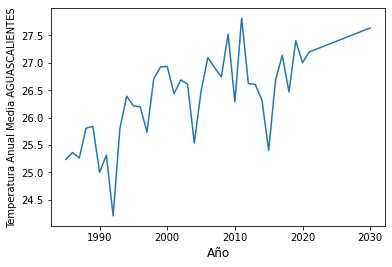

In [ ]:
y = df.columns.values.tolist()
print(y[1])

j = 0
for i in estados_abv:
  df = pd.DataFrame(tmed_por_entidad[i])
  plt.figure()

  p = sns.lineplot(data=df, x= "ANIO", y = "ANUAL")
    
  p.set_xlabel("Año", fontsize = 12)
  p.set_ylabel("Temperatura Anual Media %s" % estados_comp[j], fontsize = 10)
  j = j+1
  break
